In [80]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as smp
from scipy.integrate import odeint
plt.style.use('classic')

# Pendulum Motion
#### Within this file I will be coding up the differential equation for pendulum motion and deriving the same equation in different way. The equation for pendulum motion is usually described in terms of a angle $\theta$
$$ \frac{d^2 \theta}{dt^2}+\frac{g}{l}\sin{\theta}=0 $$
#### Where $\theta$ is the angle w.r.t the vertical, g is the gravitational constant of 9.81 m/s^2, and l is the length of the wire (or string, or rod, etc) from the pivot point and the mass oscillating.

#### Using the small angle approximation we can solve for $\theta (t)$ and get a solution of $\theta (t) = \theta_0\cos{(\sqrt{\frac{g}{l}}t)}$

Text(0, 0.5, '$\\theta$ (t)')

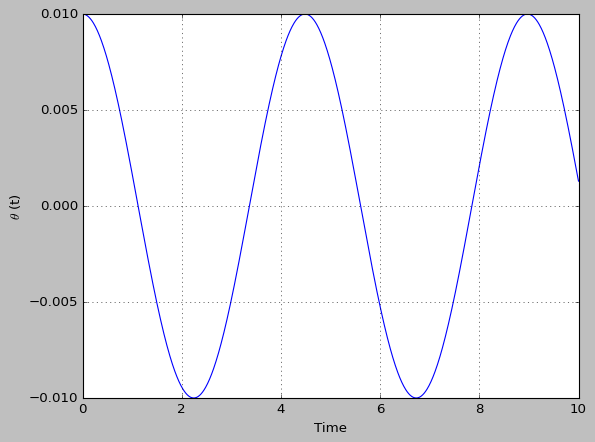

In [147]:
g, l, theta0, t = smp.symbols("g l \\theta_0, t")
#we are going to let theta0 be 0.01, g=9.8, and l=5. 0<t<10 for 1000 points
tt = np.linspace(0, 10, 1000)
theta = smp.symbols("\\theta", cls=smp.Function)
theta = theta0*smp.cos(smp.sqrt(g/l)*t)
func = smp.lambdify((g, l, theta0, t), theta)
plt.plot(tt, func(9.81, 5, 0.01, tt))
plt.grid()
plt.xlabel("Time")
plt.ylabel(r"$\theta$ (t)")

In [149]:
m, t, g = smp.symbols('m t g')
x, y, theta = smp.symbols('x y \\theta', cls=smp.Function)
theta = theta(t)


theta_d = smp.diff(theta, t)
theta_dd = smp.diff(theta, (t, 2))

x = x(theta)
y = y(theta)
x_d = smp.diff(x, theta)
y_d = smp.diff(y, theta)


In [236]:
path = 'parab'
if path == 'parab':
    x = theta
    y = theta**2
    x_f = smp.lambdify(theta, x)
    y_f = smp.lambdify(theta, y)


In [237]:
T = 1/2*m*(smp.diff(x, t)**2 + smp.diff(y, t)**2)
V = m*g*y
T

0.5*m*(4*\theta(t)**2*Derivative(\theta(t), t)**2 + Derivative(\theta(t), t)**2)

In [238]:
V

g*m*\theta(t)**2

In [239]:
L = T-V
L

-g*m*\theta(t)**2 + 0.5*m*(4*\theta(t)**2*Derivative(\theta(t), t)**2 + Derivative(\theta(t), t)**2)

In [240]:
LE = smp.diff(L, theta) - smp.diff(smp.diff(L, theta_d), t)
LE

-2*g*m*\theta(t) - 0.5*m*(8*\theta(t)**2*Derivative(\theta(t), (t, 2)) + 16*\theta(t)*Derivative(\theta(t), t)**2 + 2*Derivative(\theta(t), (t, 2))) + 4.0*m*\theta(t)*Derivative(\theta(t), t)**2

#### Now to make our lives easier, and also possible within python, we are going to parameterize our derivatives. Let $ \frac{d\theta}{dt}=\omega $ and $ \frac{d^2\theta}{dt^2}= \frac{d\omega}{dt}$. This is done to change our LE from a Second ODE into a First ODE. This makes our lives much easier, and for odeint as well.

In [241]:
omega = theta_d
omega_d = smp.solve(LE, theta_dd)[0]


In [242]:
omega_d

2.0*(-g - 2.0*Derivative(\theta(t), t)**2)*\theta(t)/(4.0*\theta(t)**2 + 1.0)

In [243]:
omega_f = smp.lambdify(theta_d, omega)
omega_d_f = smp.lambdify((g, theta, theta_d), omega_d)

#### Next we need to use odeint. Odeint is a function from scipy.integrate, and takes in a function f and domain t. It will compute the derivative of the function over all of the points in t. For us we need to give it a derivatived function that contains our parameters $\omega$ and $d\omega/dt$. This both of these are 

In [244]:
def dSdt(S, t):
    return [
        omega_f(S[1]),
        omega_d_f(9.81, S[0], S[1])
    ]


tt = np.linspace(0, 10, 1000)
ans = odeint(dSdt, y0=[2, 0], t=tt)



Text(0.5, 1.0, 'Plotting $\\theta$ and $\\omega$ and functions of time t')

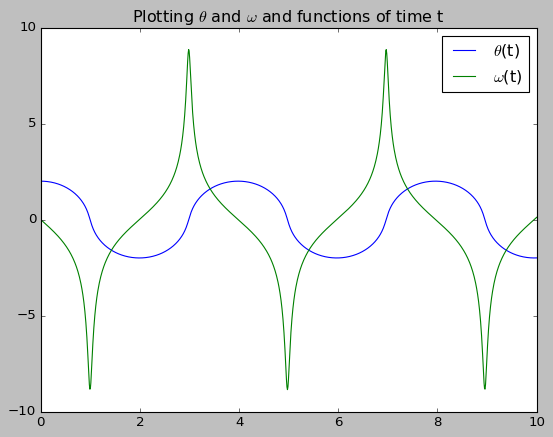

In [247]:
plt.plot(tt, ans.T[0], label=r"$\theta$(t)")
plt.plot(tt, ans.T[1], label=r"$\omega$(t)")
plt.legend()
plt.title("Plotting $\\theta$ and $\omega$ and functions of time t")

#### Now we have plotting how our angle changes with time. Lets know explore how x and y are changing with time.

Text(0.5, 1.0, 'Path our pendulum will take')

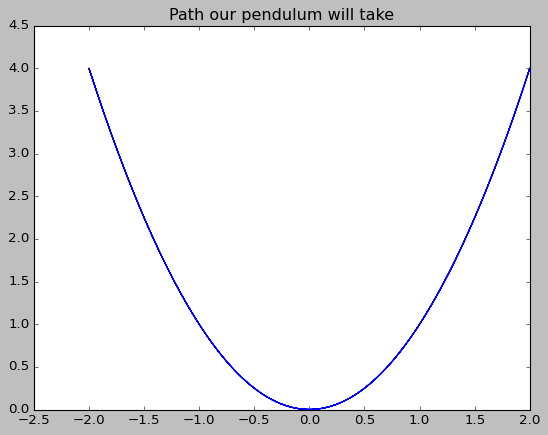

In [262]:
def xy(theta):
    return np.array([x_f(theta), y_f(theta)])

xy_plot = xy(ans.T[0])
plt.plot(xy_plot[0], xy_plot[1])
plt.title("Path our pendulum will take")
